# Prediksi Harga Hp

Latar Belakang : 
Bob telah memulai perusahaan selulernya sendiri. Dia ingin memberikan perlawanan keras kepada perusahaan besar seperti Apple, Samsung, dll.

Dia tidak tahu bagaimana memperkirakan harga ponsel yang dibuat perusahaannya. Di pasar telepon selular yang kompetitif Anda tidak bisa hanya berasumsi. Untuk mengatasi masalah ini ia mengumpulkan data penjualan ponsel dari berbagai perusahaan.

Bob ingin mengetahui hubungan antara fitur-fitur sebuah ponsel (misalnya:- RAM, Memori Internal, dll) dan harga jualnya. Tapi dia tidak begitu pandai dalam Machine Learning. Jadi dia membutuhkan bantuan Anda untuk menyelesaikan masalah ini.

Dalam soal ini, Anda tidak harus memprediksi harga sebenarnya tetapi kisaran harga yang menunjukkan seberapa tinggi harga tersebut

Price_range merupakan variabel target dengan nilai 1 (biaya rendah), 2 (biaya sedang), 3 (biaya tinggi) dan 4 (biaya sangat tinggi)

## DataSet
src kaggle : https://www.kaggle.com/datasets/jai8004/mobile-price-prediction/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('MobilePrice.csv')

In [2]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_mpixels,has_4g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,has_3g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,Medium Cost
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,High Cost
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,High Cost
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,High Cost
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,Medium Cost


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battery_power         2000 non-null   int64  
 1   bluetooth             2000 non-null   object 
 2   clock_speed           2000 non-null   float64
 3   dual_sim              2000 non-null   object 
 4   front_camera_mpixels  2000 non-null   int64  
 5   has_4g                2000 non-null   object 
 6   int_memory            2000 non-null   int64  
 7   m_dep                 2000 non-null   float64
 8   mobile_wt             2000 non-null   int64  
 9   n_cores               2000 non-null   int64  
 10  pc                    2000 non-null   int64  
 11  px_height             2000 non-null   int64  
 12  px_width              2000 non-null   int64  
 13  ram                   2000 non-null   int64  
 14  sc_h                  2000 non-null   int64  
 15  sc_w                 

In [4]:
df.shape

(2000, 21)

In [5]:
df.describe()

,battery_power,clock_speed,front_camera_mpixels,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [6]:
df.isna().sum()

battery_power           0
bluetooth               0
clock_speed             0
dual_sim                0
front_camera_mpixels    0
has_4g                  0
int_memory              0
m_dep                   0
mobile_wt               0
n_cores                 0
pc                      0
px_height               0
px_width                0
ram                     0
sc_h                    0
sc_w                    0
talk_time               0
has_3g                  0
touch_screen            0
wifi                    0
price_range             0
dtype: int64

In [7]:
df.duplicated().sum()

0

Text(0.5, 1.0, "Distribusi Harga Hp berdasarkan 'price_range'")

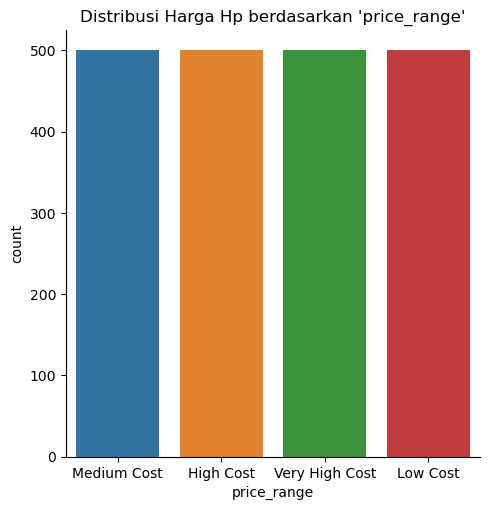

In [8]:
sns.catplot(data=df, x='price_range', kind='count')
plt.title("Distribusi Harga Hp berdasarkan 'price_range'")

Mengubah nilai 'price_range' menjadi numeric

In [9]:
price = {'Low Cost':1, 'Medium Cost':2 , 'High Cost':3 , 'Very High Cost':4}

In [10]:
df['price_range'] =  df['price_range'].map(price)

In [11]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_mpixels,has_4g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,has_3g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,2
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,3
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,3
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,3
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,2


Sekarang nilai dari kolom 'price_range' sudah menjadi numeric :
- low price = 1
- medium price = 2
- high price = 3
- very high price = 4

Text(0.5, 1.0, "Distribusi Harga Hp berdasarkan 'price_range'")

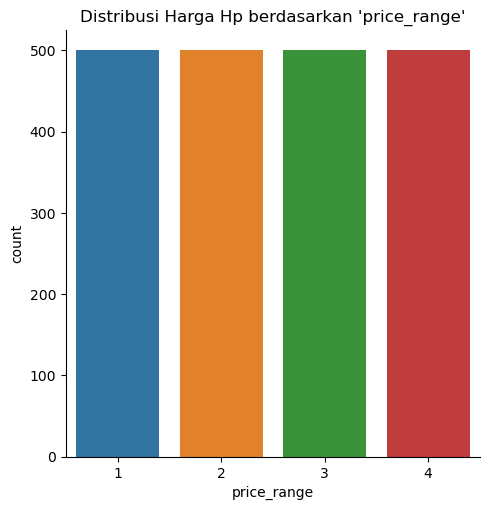

In [12]:
sns.catplot(data=df, x='price_range', kind='count')
plt.title("Distribusi Harga Hp berdasarkan 'price_range'")

kisaran harga memiliki distribusi yang merata, artinya data sampel untuk setiap kisaran harga adalah sama

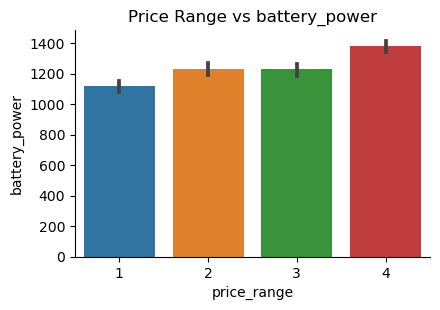

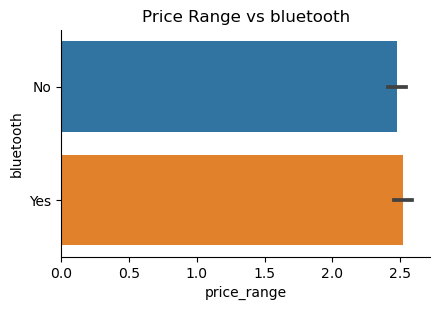

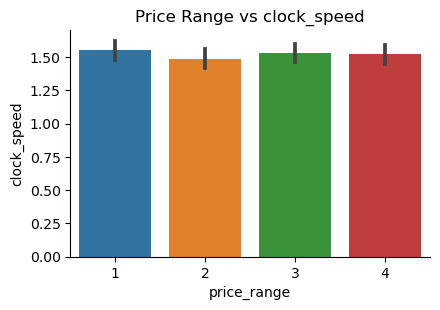

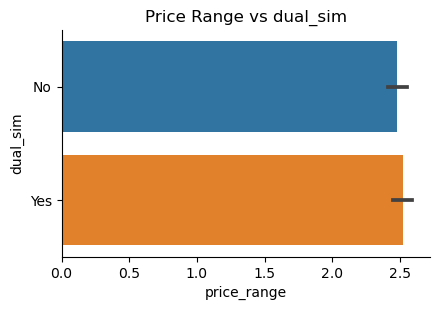

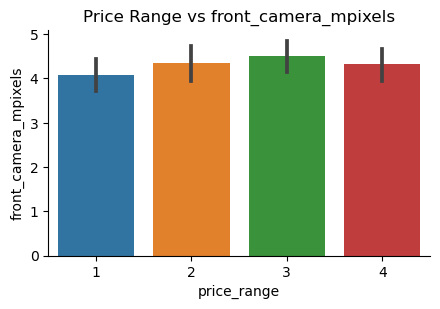

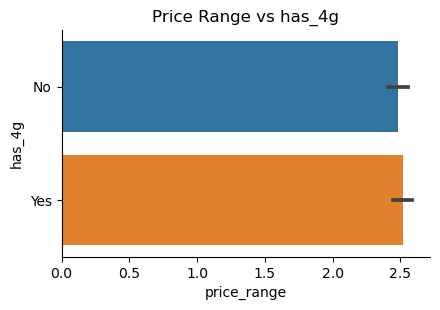

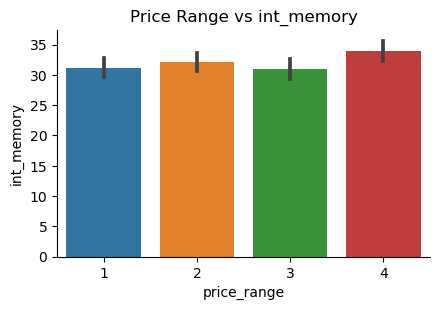

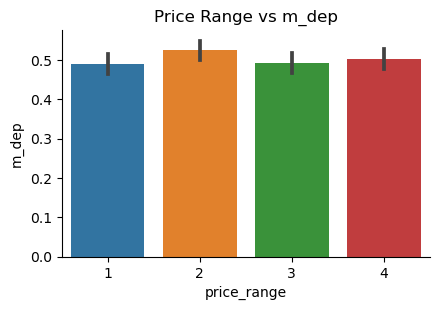

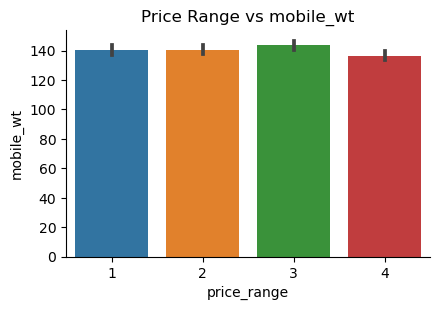

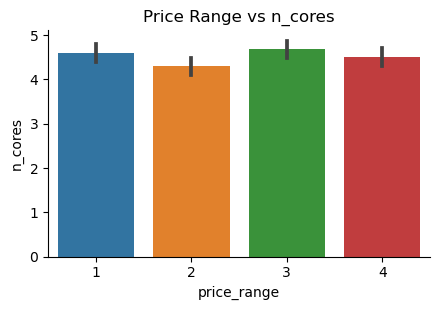

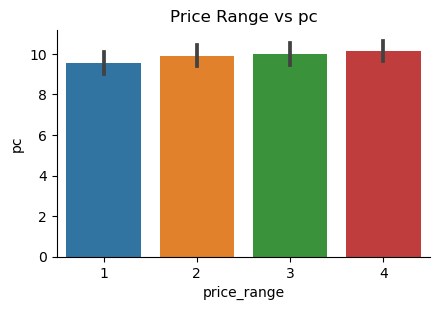

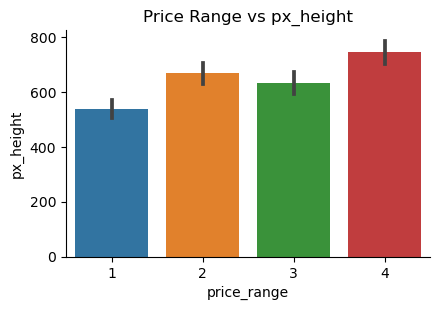

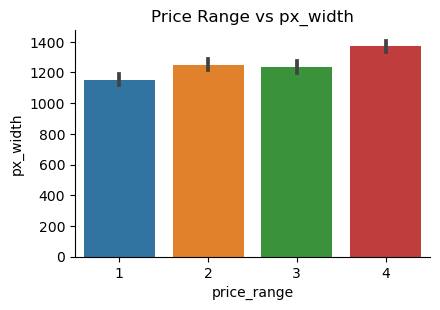

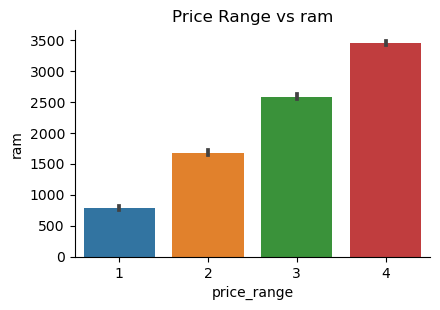

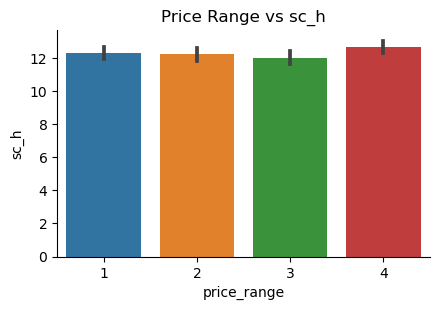

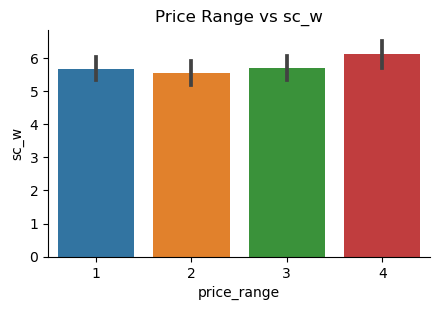

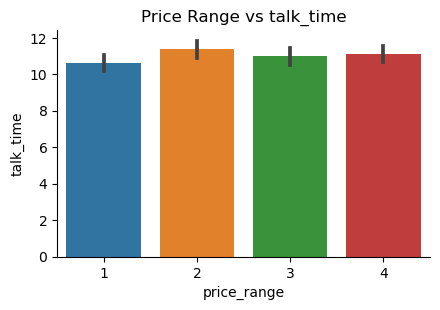

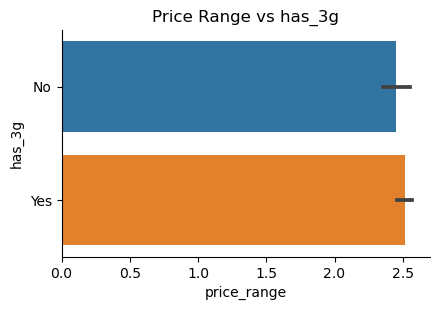

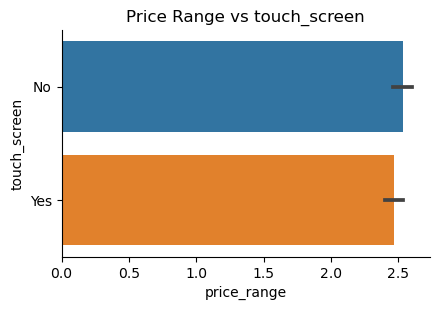

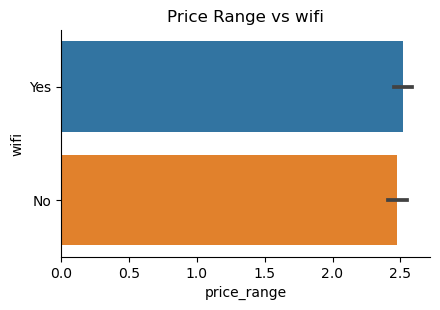

In [13]:
column = df.columns[~(df.columns == 'price_range')]
for i in column:
  sns.catplot(data=df, x='price_range', y=i, kind='bar', height=3, aspect=1.5)
  plt.title(f"Price Range vs {i}")

satu-satunya variabel kuat yang menentukan kisaran harga adalah RAM (semakin tinggi kapasitas RAM maka range_harga juga semakin tinggi)

In [14]:
average_by_price_range = df.groupby('price_range').mean().T

# Print or display the resulting DataFrame
print(average_by_price_range)

price_range                   1          2          3          4
battery_power         1116.9020  1228.8680  1228.3200  1379.9840
clock_speed              1.5502     1.4886     1.5298     1.5204
front_camera_mpixels     4.0840     4.3400     4.4980     4.3160
int_memory              31.1740    32.1160    30.9200    33.9760
m_dep                    0.4902     0.5240     0.4908     0.5020
mobile_wt              140.5520   140.5100   143.6140   136.3200
n_cores                  4.6000     4.2980     4.6820     4.5020
pc                       9.5740     9.9240    10.0180    10.1500
px_height              536.4080   666.8920   632.2840   744.8480
px_width              1150.2700  1251.9080  1234.0460  1369.8380
ram                    785.3140  1679.4900  2582.8160  3449.2320
sc_h                    12.3240    12.2120    12.0100    12.6800
sc_w                     5.6820     5.5440     5.7140     6.1280
talk_time               10.6120    11.3620    10.9720    11.0980


/var/folders/xs/hmgp6fbx0ql09zjj9ntm07l40000gn/T/ipykernel_17175/500791716.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_by_price_range = df.groupby('price_range').mean().T


### Data Insight

Analisis:
1. Daya baterai: ponsel paling mahal (kisaran harga 3) memiliki daya baterai tertinggi, sedangkan ponsel termurah memiliki daya baterai paling rendah
2. Bluetooth: semua kategori ponsel memiliki bluetooth
3. Kecepatan Jam & waktu bicara: tidak ada perbedaan yang signifikan antara setiap kisaran harga.
4. Dual sim: semua kategori ponsel memiliki dual sim
5. Kamera (kamera depan & kamera utama): terdapat kesamaan jumlah megapiksel kamera depan untuk semua kategori, namun yang termahal memiliki megapiksel kamera utama terbaik
6. Jaringan (3G, 4G, WiFi): semua ponsel memiliki jaringan 3G dan 4G, dan jumlahnya tidak menunjukkan variasi yang signifikan di semua kategori. Wifi juga sepertinya tidak mempengaruhi harga.
7. Sistem operasi (ncore, memori internal, ram): kisaran harga 3 memiliki memori internal dan ram tertinggi, yang masuk akal karena biasanya ponsel mahal memiliki memori & kecepatan lebih tinggi. Semua kisaran harga memiliki ncore yang serupa
8. Ukuran dan resolusi layar: ponsel termahal memiliki resolusi tertinggi. Namun menarik untuk melihat bahwa ukuran layar ponsel termurah mendekati yang termahal.
9. Berat: kisaran harga 3 adalah ponsel paling ringan sedangkan kisaran harga 0 adalah ponsel terberat.
10. Layar sentuh: semua ponsel memiliki layar sentuh

Kesimpulannya, daya baterai, kamera, sistem operasi (khususnya ram dan memori), resolusi, dan bobot paling mempengaruhi kisaran harga.

#### Price-range dan RAM

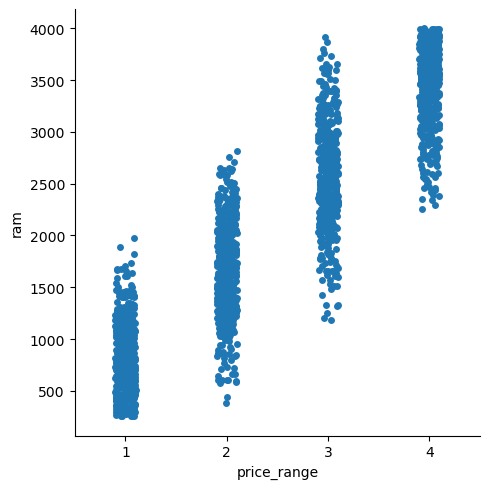

In [15]:
sns.catplot(data=df, x='price_range', y='ram')

harga hp yang paling tinggi adalah hp yang kapasitas ramnya juga tinggi.

#### Price_range dan Baterai

Text(0.5, 1.0, 'Rata-rata Battery Power by Price Range')

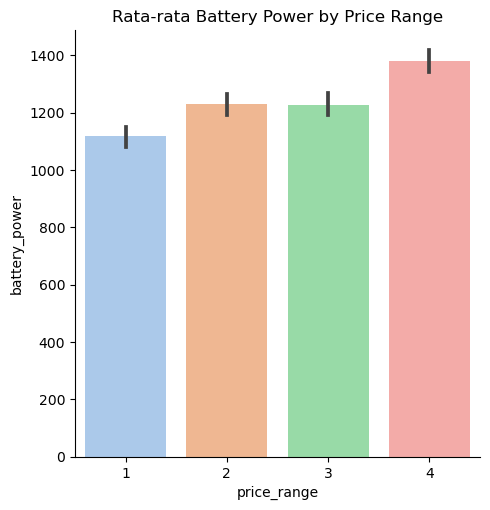

In [16]:
sns.catplot(data=df, x='price_range', y='battery_power', kind='bar', palette='pastel')
plt.title('Rata-rata Battery Power by Price Range')

Text(0.5, 1.0, 'Battery Power Distribution by Price Range')

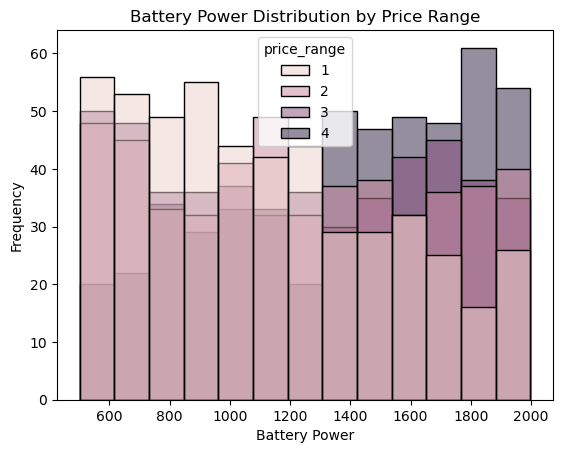

In [17]:
sns.histplot(data=df, x='battery_power', hue='price_range')

# Add labels and a title
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.title('Battery Power Distribution by Price Range')

semakin tinggi daya baterai maka kisaran harganya akan semakin mahal
dari grafik tersebut juga dapat melihat bahwa kisaran harga 1 - 2 (biaya menengah - tinggi) memiliki daya baterai yang sangat mirip

#### Price_range dan Kamera

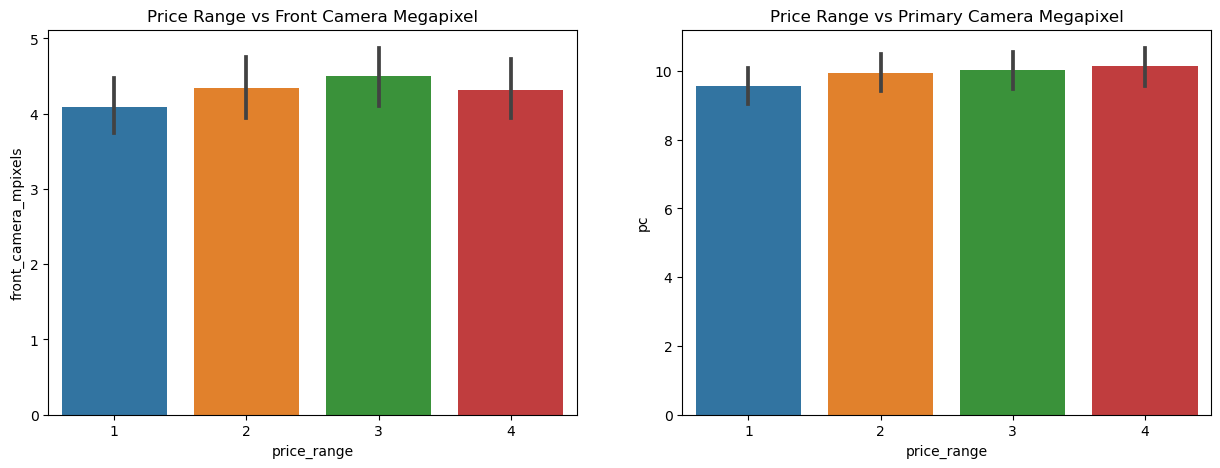

In [18]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create bar plots for 'fc' and 'pc' with specified axes
sns.barplot(data=df, ax=ax[0], x='price_range', y='front_camera_mpixels')
sns.barplot(data=df, x='price_range', y='pc', ax=ax[1])

# Set titles for subplots
ax[0].set_title("Price Range vs Front Camera Megapixel")
ax[1].set_title("Price Range vs Primary Camera Megapixel")

# Display the plots
plt.show()

Anehnya, kisaran harga 3 (biaya tinggi) memiliki kamera depan yang lebih baik dan memiliki megapiksel kamera utama yang sangat dekat dengan ponsel termahal.

In [19]:
print(df["int_memory"].groupby(df["price_range"]).mean().sort_values(ascending=False))
print(df["n_cores"].groupby(df["price_range"]).mean().sort_values(ascending=False))

price_range
4    33.976
2    32.116
1    31.174
3    30.920
Name: int_memory, dtype: float64
price_range
3    4.682
1    4.600
4    4.502
2    4.298
Name: n_cores, dtype: float64


Menurut saya, membeli ponsel di kisaran harga 3 akan sangat bermanfaat bagi seseorang yang suka fotografi dan suka selfie, karena beberapa ponsel di kisaran harga 3 juga tidak terlalu buruk memori internalnya, masih di kisaran 30 meski di kisaran 2 adalah yang terendah.

Seseorang yang menyukai game sebaiknya membeli ponsel dalam kisaran harga 3, karena memiliki angka core yang paling tinggi.

In [20]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_mpixels,has_4g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,has_3g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,2
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,3
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,3
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,3
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battery_power         2000 non-null   int64  
 1   bluetooth             2000 non-null   object 
 2   clock_speed           2000 non-null   float64
 3   dual_sim              2000 non-null   object 
 4   front_camera_mpixels  2000 non-null   int64  
 5   has_4g                2000 non-null   object 
 6   int_memory            2000 non-null   int64  
 7   m_dep                 2000 non-null   float64
 8   mobile_wt             2000 non-null   int64  
 9   n_cores               2000 non-null   int64  
 10  pc                    2000 non-null   int64  
 11  px_height             2000 non-null   int64  
 12  px_width              2000 non-null   int64  
 13  ram                   2000 non-null   int64  
 14  sc_h                  2000 non-null   int64  
 15  sc_w                 

### Feature Enginering

In [22]:
bluetooth = {'Yes' : 1, 'No' : 0}

In [23]:
df['bluetooth'] = df['bluetooth'].map(bluetooth)

In [24]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_mpixels,has_4g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,has_3g,touch_screen,wifi,price_range
0,842,0,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,2
1,1021,1,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,3
2,563,1,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,3
3,615,1,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,3
4,1821,1,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,2


In [25]:
df['dual_sim'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
dual_sim = {'Yes' : 1, 'No' : 0}
df['dual_sim'] = df['dual_sim'].map(dual_sim)

In [27]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_mpixels,has_4g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,has_3g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,2
1,1021,1,0.5,1,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,3
2,563,1,0.5,1,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,3
3,615,1,2.5,0,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,3
4,1821,1,1.2,0,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,2


In [28]:
df['has_4g'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
has_4g = {'Yes' : 1, 'No' : 0}
df['has_4g'] = df['has_4g'].map(has_4g)

In [30]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_mpixels,has_4g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,has_3g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,3
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,3
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,3
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,2


In [31]:
df['has_3g'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df['touch_screen'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
df['wifi'].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
has_3g = {'Yes' : 1, 'No' : 0}
df['has_3g'] = df['has_3g'].map(has_3g)

touch_screen = {'Yes' : 1, 'No' : 0}
df['touch_screen'] = df['touch_screen'].map(touch_screen)

wifi = {'Yes' : 1, 'No' : 0}
df['wifi'] = df['wifi'].map(wifi)

In [35]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_mpixels,has_4g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,has_3g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,3
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,3
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,3
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,2


Sekarang seluruh feature sudah menjadi feature numeric

In [36]:
df['pc'].unique()

array([ 2,  6,  9, 14,  7, 10,  0, 15,  1, 18, 17, 11, 16,  4, 20, 13,  3,
       19,  8,  5, 12])

In [37]:
pd.set_option('display.max_columns', None)
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_mpixels,has_4g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,has_3g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,3
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,3
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,3
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,2


### Data Split

In [38]:
from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['price_range'])]
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [39]:
X_train

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_mpixels,has_3g,has_4g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi
0,842,0,2.2,0,1,0,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,1
816,805,1,0.7,0,0,0,0,64,0.1,97,4,14,641,704,418,11,6,17,1,1
790,911,1,2.9,0,0,0,0,46,0.1,181,5,1,461,670,363,9,5,17,1,0
361,899,0,0.5,1,13,1,1,57,0.9,172,2,18,788,1331,364,11,1,7,1,0
592,1263,0,0.5,0,12,0,0,64,0.3,175,5,18,178,1883,1183,14,3,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,1,0.5,1,0,1,1,11,0.9,109,2,12,35,510,1672,17,13,19,1,0
1096,1154,0,2.0,0,6,1,1,35,0.8,159,5,16,1003,1827,3262,16,15,16,0,0
1932,718,1,1.6,1,1,1,1,30,0.4,93,3,12,662,997,1601,10,9,12,1,1
235,1523,1,1.8,0,6,1,1,11,0.1,129,1,8,148,1606,707,19,8,19,1,0


In [40]:
y_train

0       2
816     1
790     1
361     1
592     2
       ..
1791    1
1096    4
1932    2
235     1
1061    2
Name: price_range, Length: 1600, dtype: int64

#### Melihat korelasi dari setiap kolom menggunakan heatmap

<Axes: >

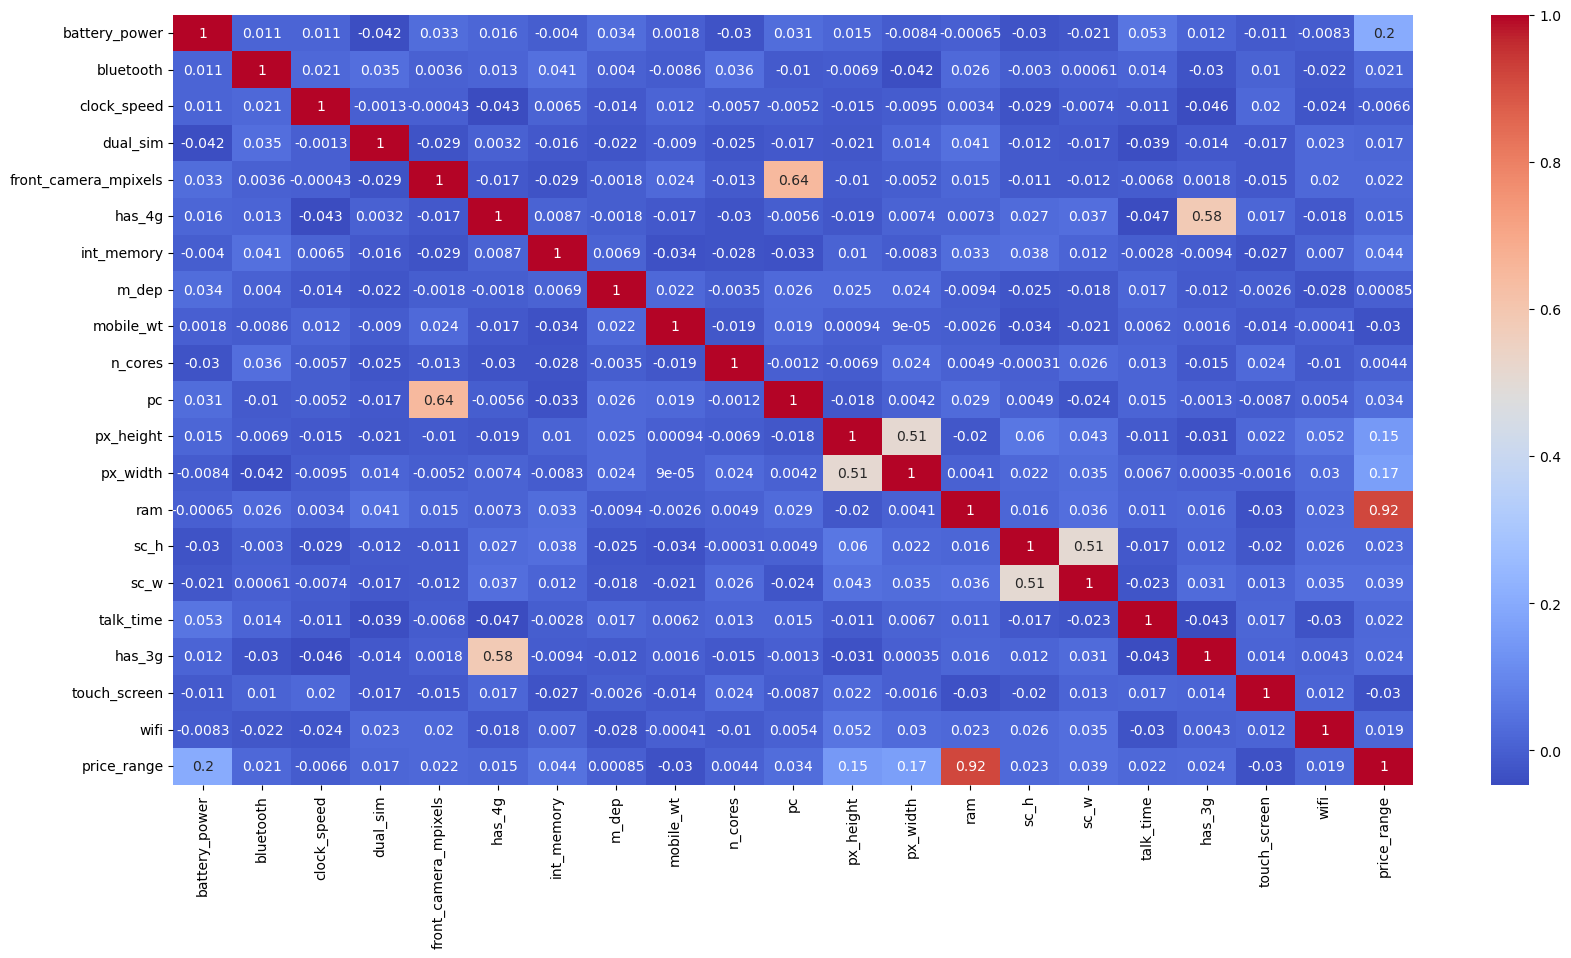

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

dari boxplot diatas terlihat beberapa kolom mempunyai korelasi antar kolom dan cukup besar (pc dan front camera = 0.64, three_g dan four_g = 0.58, px_width dan px_height = 0.61)

- pc = primary camera megapixel


#### Feature Scalling Data
tujuannya adalah untuk membuat transformasi data tersebut memiliki rata-rata 0 dan deviasi standar 1.

In [42]:
# Iterate through columns
def feature_scale(dataframe):
  selected_columns = []
  for column in dataframe.columns:
    unique_values = dataframe[column].unique()
    if not (0 in unique_values and 1 in unique_values) or len(unique_values) > 2:
      selected_columns.append(column)
  # Create a new DataFrame with selected columns
  filtered_df = dataframe[selected_columns]
  return filtered_df

In [43]:
x_train_feature_scale = feature_scale(X_train)
X_train[x_train_feature_scale.columns]

,battery_power,clock_speed,front_camera_mpixels,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
816,805,0.7,0,64,0.1,97,4,14,641,704,418,11,6,17
790,911,2.9,0,46,0.1,181,5,1,461,670,363,9,5,17
361,899,0.5,13,57,0.9,172,2,18,788,1331,364,11,1,7
592,1263,0.5,12,64,0.3,175,5,18,178,1883,1183,14,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,0.5,0,11,0.9,109,2,12,35,510,1672,17,13,19
1096,1154,2.0,6,35,0.8,159,5,16,1003,1827,3262,16,15,16
1932,718,1.6,1,30,0.4,93,3,12,662,997,1601,10,9,12
235,1523,1.8,6,11,0.1,129,1,8,148,1606,707,19,8,19


In [44]:
X_test_feature_scale = feature_scale(X_test)
X_test[X_test_feature_scale.columns]

,battery_power,clock_speed,front_camera_mpixels,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
674,1034,2.6,2,45,0.3,190,3,4,182,1293,969,15,1,7
1699,1002,1.8,1,45,0.7,180,7,7,948,1007,1234,19,13,18
1282,609,0.5,4,10,0.1,81,6,6,113,1524,1905,16,3,18
1315,1510,0.6,1,32,0.7,135,3,8,963,1520,854,8,2,10
1210,805,1.7,0,58,0.9,168,3,10,81,1544,3397,7,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1266,1.9,0,7,0.2,184,3,12,346,1468,2532,10,5,4
763,1741,1.8,0,14,0.7,143,8,0,730,1895,3387,11,3,3
385,1880,1.8,4,18,0.7,138,3,5,71,699,3333,17,15,7
1667,1967,0.5,0,46,0.6,199,1,7,518,1374,1567,15,2,7


StandartScaller()

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

untuk X_test, hanya gunakan transformasi untuk menerapkan parameter penskalaan yang sama ke data baru.

In [47]:
X_test_feature_scale = feature_scale(X_test)
X_test[X_test_feature_scale.columns]
X_train[x_train_feature_scale.columns] = sc.fit_transform(X_train[x_train_feature_scale.columns])
X_test[X_test_feature_scale.columns]= sc.transform(X_test[X_test_feature_scale.columns])

In [48]:
X_train

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_mpixels,has_3g,has_4g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi
0,-0.931816,0,0.841708,0,-0.764028,0,0,-1.397035,0.340495,1.380102,-1.102412,-1.298686,-1.403771,-1.131787,0.398985,-0.787650,0.292587,1.479483,0,1
816,-1.016747,1,-0.995581,0,-0.994939,0,0,1.739356,-1.384622,-1.217267,-0.230509,0.682150,0.002018,-1.251690,-1.550368,-0.311189,0.063107,1.110764,1,1
790,-0.773432,1,1.699110,0,-0.994939,0,0,0.748917,-1.384622,1.180304,0.205442,-1.463755,-0.405457,-1.330088,-1.600680,-0.787650,-0.166373,1.110764,1,0
361,-0.800977,0,-1.240553,1,2.006908,1,1,1.354185,1.375565,0.923422,-1.102412,1.342429,0.334789,0.194063,-1.599765,-0.311189,-1.084293,-0.732828,1,0
592,0.034559,0,-1.240553,0,1.775997,0,0,1.739356,-0.694575,1.009049,0.205442,1.342429,-1.046098,1.466879,-0.850577,0.403503,-0.625333,1.110764,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,-0.103167,1,-1.240553,1,-0.994939,1,1,-1.176938,1.375565,-0.874757,-1.102412,0.352011,-1.369815,-1.699021,-0.403259,1.118195,1.669466,1.479483,1,0
1096,-0.215643,0,0.596736,0,0.390529,1,1,0.143648,1.030542,0.552369,0.205442,1.012290,0.821495,1.337752,1.051209,0.879964,2.128426,0.926405,0,0
1932,-1.216449,1,0.106792,1,-0.764028,1,1,-0.131474,-0.349552,-1.331437,-0.666461,0.352011,0.049556,-0.576083,-0.468207,-0.549419,0.751547,0.188968,1,1
235,0.631370,1,0.351764,0,0.390529,1,1,-1.176938,-1.384622,-0.303906,-1.538363,-0.308268,-1.114011,0.828165,-1.286002,1.594656,0.522067,1.479483,1,0


In [ ]:
Sekarang rata-rata sebaran data sudah